In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import glob
from scipy import signal

In [2]:
source = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Centroids_Trimmed"
figpath = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Figures"

In [3]:
def gaussian(x,y):
    gauss = signal.gaussian(10,3)
    x_gauss = signal.convolve(x, gauss, mode='same', method = 'direct') / gauss.sum()
    y_gauss = signal.convolve(y, gauss, mode = 'same', method = 'direct') / gauss.sum()
    return(x_gauss, y_gauss)

In [4]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    Nt = Nx
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
 
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

In [5]:
csv_list = glob.glob(source + "//*.csv")
print(len(csv_list))

32


Sham_1_12_35598
Experimental_7_4_54607
Experimental_7_1_36846
Sham_6_0_83460
Sham_1_11_33803
Experimental_7_3_41552
Sham_3_0_77208
Experimental_4_1_72340
Sham_7_0_63837
Experimental_7_0_36526
Sham_1_13_37142
Sham_1_14_38514
Experimental_1_0_52688
Experimental_7_2_40443
Sham_1_10_31980
Sham_7_1_64994


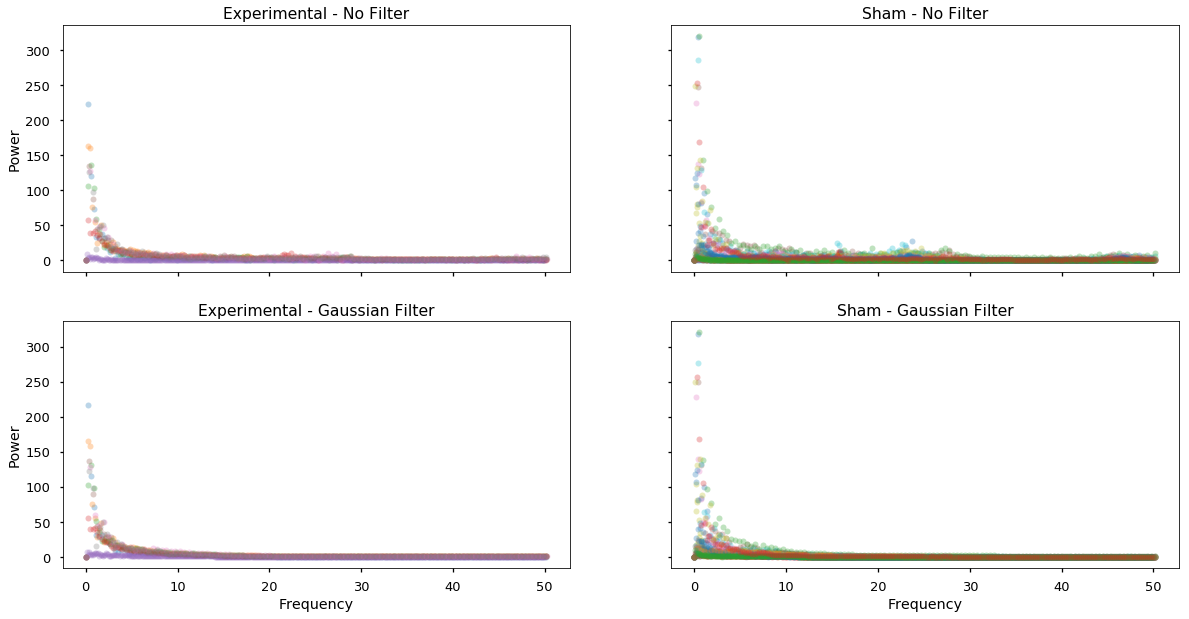

In [6]:
f, ax = plt.subplots(2,2, figsize = (20,10), sharex = True, sharey = True)
for element in csv_list:
    df = pd.read_csv(element)
    x, y, time = df.X_position.values, df.Y_position.values, df.FrameNumber.values


    visit_number = df.VisitNumber[0]

    xf, Nx, fftx = Tortuosity(x, time)
    yf, Ny, ffty = Tortuosity(y, time)


    if element[77:].startswith("Experimental"):


        sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))

        ax[0,0].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
        ax[0,0].set_title("Experimental - No Filter")


        x_gauss, y_gauss = gaussian(x,y)
        xf, Nx, fftx = Tortuosity(x_gauss, time)
        yf, Ny, ffty = Tortuosity(y_gauss, time)

        sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))
        ax[1,0].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
        ax[1,0].set_title("Experimental - Gaussian Filter")
        
        
        ax[1,0].set_xlabel("Frequency")
        ax[0,0].set_ylabel("Power")
        ax[1,0].set_ylabel("Power")
        
        if max(sum_xy) > 25:
            print(element[77:-4])
    
    if element[77:].startswith("Sham"):
        

        sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))
        ax[0,1].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
        ax[0,1].set_title("Sham - No Filter")

        x_gauss, y_gauss = gaussian(x,y)
        xf, Nx, fftx = Tortuosity(x_gauss, time)
        yf, Ny, ffty = Tortuosity(y_gauss, time)
        sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))
        ax[1,1].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
        ax[1,1].set_title("Sham - Gaussian Filter")
        
        ax[1,1].set_xlabel("Frequency")

        
        if max(sum_xy) > 25:
            print(element[77:-4])

    # plt.savefig(figpath + '//Summated_first8FFTs.png')
    # plt.show()   

the first zoom view of the first 10 Hz has a different y-axis scale than all of the other zoom views


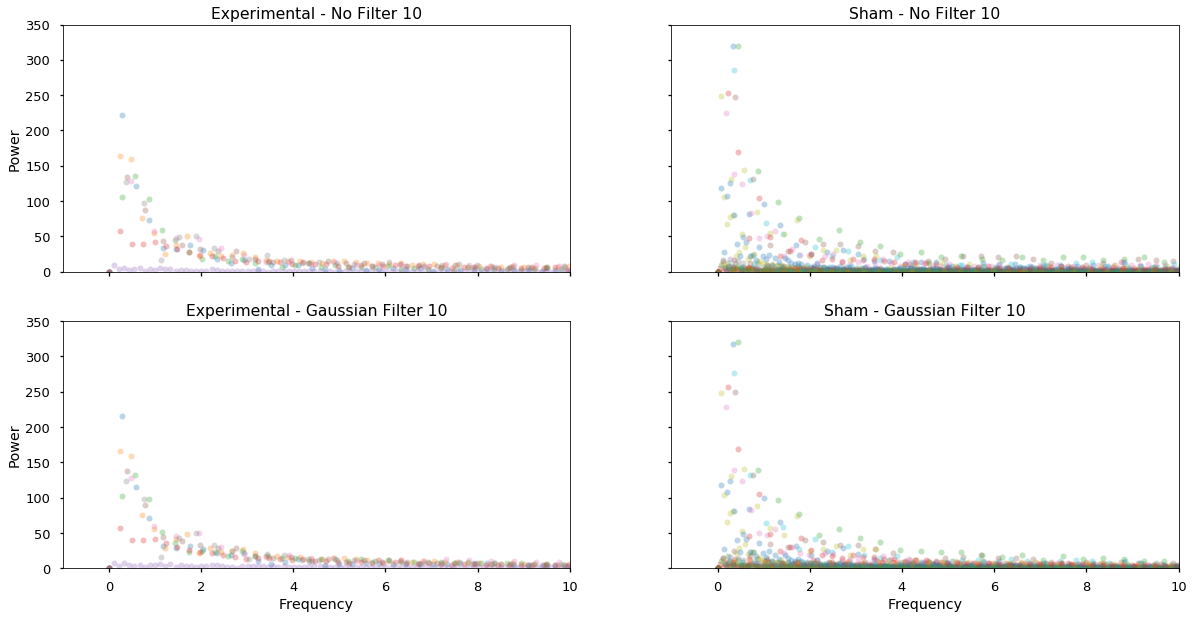

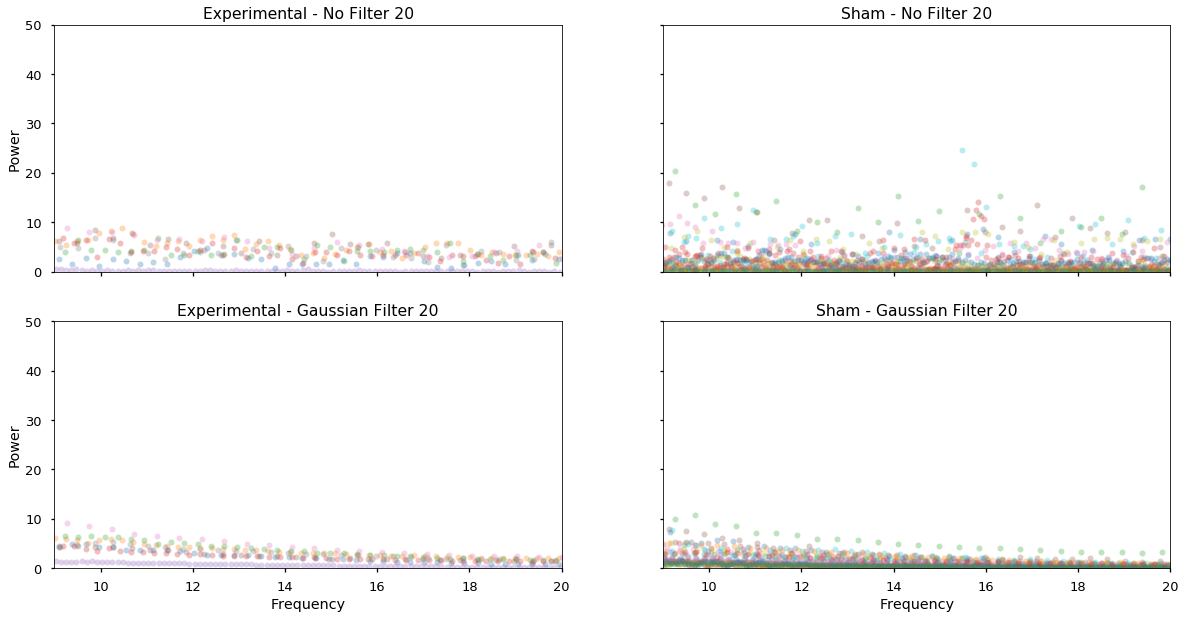

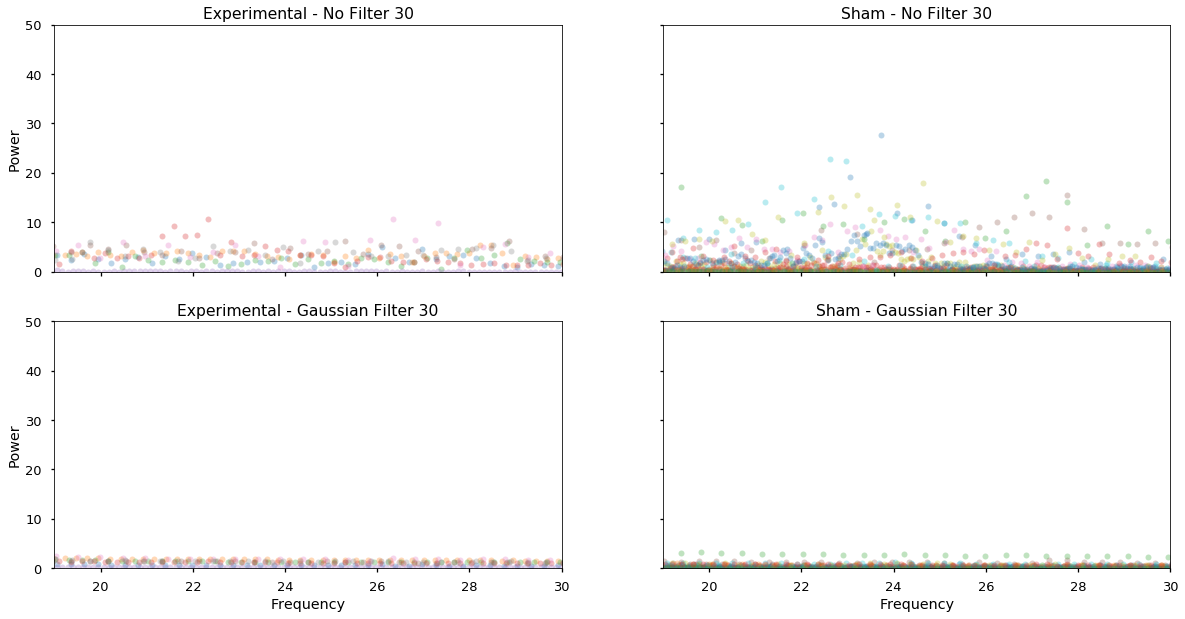

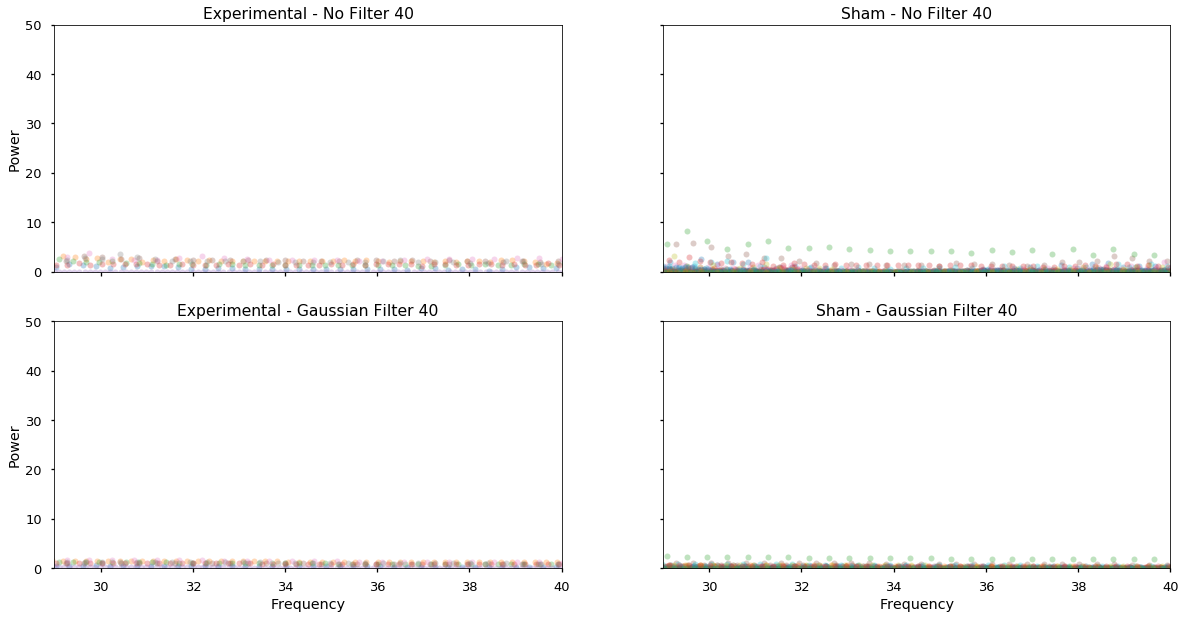

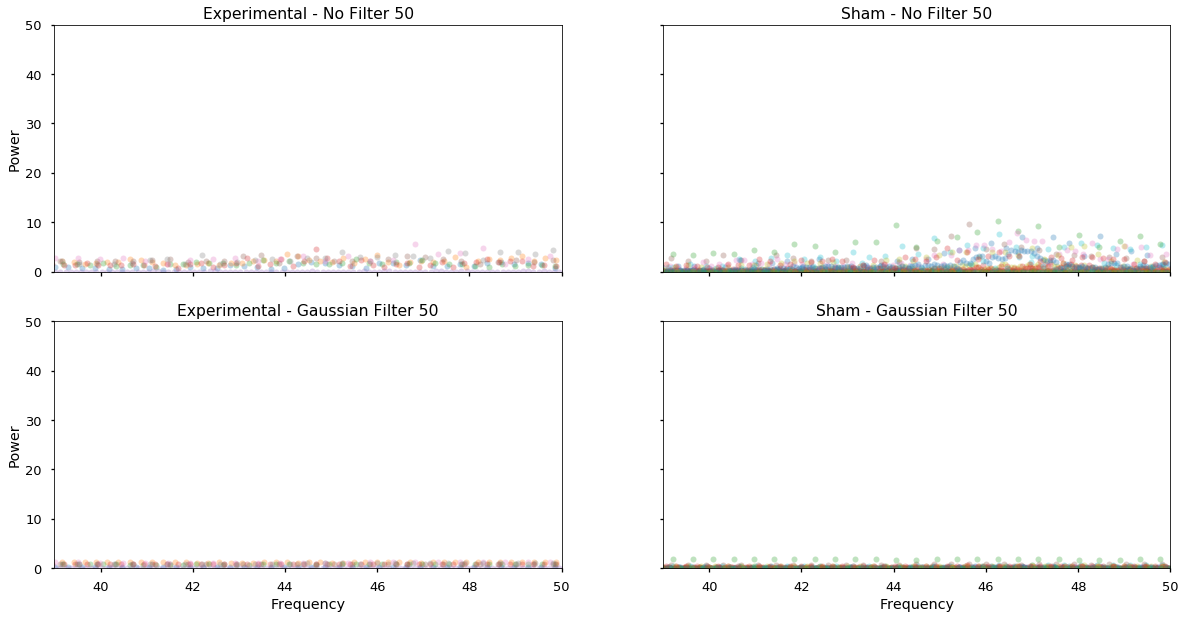

In [7]:
# the first zoom view of the first 10 Hz has a different y-axis scale than all of the other zoom views
x_bin_list = [10,20,30, 40, 50]
print('the first zoom view of the first 10 Hz has a different y-axis scale than all of the other zoom views')
for x_bin in x_bin_list:
    if x_bin > 10:
        max_y = 50
    else:
        max_y = 350
    
    f, ax = plt.subplots(2,2, figsize = (20,10), sharex = True, sharey = True)
    for element in csv_list:
        df = pd.read_csv(element)
        x, y, time = df.X_position.values, df.Y_position.values, df.FrameNumber.values


        visit_number = df.VisitNumber[0]

        xf, Nx, fftx = Tortuosity(x, time)
        yf, Ny, ffty = Tortuosity(y, time)


        if element[77:].startswith("Experimental"):


            sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))

            ax[0,0].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
            ax[0,0].set_xlim(x_bin-11,x_bin)
            ax[0,0].set_ylim(0,max_y)
            ax[0,0].set_title("Experimental - No Filter " + str(x_bin))


            x_gauss, y_gauss = gaussian(x,y)
            xf, Nx, fftx = Tortuosity(x_gauss, time)
            yf, Ny, ffty = Tortuosity(y_gauss, time)

            sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))
            ax[1,0].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
            ax[1,0].set_title("Experimental - Gaussian Filter " + str(x_bin))

            ax[1,0].set_xlabel("Frequency")
            ax[0,0].set_ylabel("Power")
            ax[1,0].set_ylabel("Power")


        if element[77:].startswith("Sham"):

            sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))
            ax[0,1].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
            ax[0,1].set_title("Sham - No Filter " + str(x_bin))

            x_gauss, y_gauss = gaussian(x,y)
            xf, Nx, fftx = Tortuosity(x_gauss, time)
            yf, Ny, ffty = Tortuosity(y_gauss, time)
            sum_xy = (2.0/Ny * np.abs(ffty[0:Ny//2]) + 2.0/Nx * np.abs(fftx[0:Nx//2]))
            ax[1,1].plot(yf, sum_xy, "o", ms = 6, alpha = 0.3)
            ax[1,1].set_title("Sham - Gaussian Filter " + str(x_bin))
            ax[1,1].set_xlabel("Frequency")

        # plt.savefig(figpath + '//Summated_first8FFTs.png')
        # plt.show()   